**Сборный проект №1**

**Описание проекта:** Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель проекта:** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:** Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

**Name** — название игры


**Platform** — платформа


**Year_of_Release** — год выпуска


**Genre** — жанр игры


**NA_sales** — продажи в Северной Америке (миллионы проданных копий)


**EU_sales** — продажи в Европе (миллионы проданных копий)


**JP_sales** — продажи в Японии (миллионы проданных копий)


**Other_sales** — продажи в других странах (миллионы проданных копий)


**Critic_Score** — оценка критиков (максимум 100)


**User_Score** — оценка пользователей (максимум 10)


**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

**План работы:**

1. Открыть файлы с данными и изучить общую информацию
2. Подготовить данные
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы
6. Написать общий вывод

### Откроем файл с данными и изучим общую информацию

In [1]:
# добавляем необходимые библиотеки
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    
    try:
        data = pd.read_csv('/Users/sergey/Downloads/games.csv')
    except :
        data = None  

if data is None:
    print('Что-то не так')
else:
    print('Данные успешно загружены')
    print('*' * 40)
    print('Вывожу первые 10 сторк датафрейма:')
    display(data.head(10))
    print('*' * 40)
    print('Вывожу основную информацию о датафрейме:')
    data.info()
    print('*' * 40)
    print('Количество явных дубликатов:', data.duplicated().sum())

Данные успешно загружены
****************************************
Вывожу первые 10 сторк датафрейма:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


****************************************
Вывожу основную информацию о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
****************************************
Количество явных дубликатов: 0


#### Вывод
Датафрейм содержит 16715 строк и 11 столбцов. Присутствуют ошибки в названии столбцов, пропуски в данных и несоответствие типа данных. Явные дубликаты отсутствуют.

### Подготовим данные

#### Заменим названия столбцов

In [3]:
data.columns = data.columns.str.lower()  # приведем названия столбцов к нижнему регистру

In [4]:
data.columns  # проверим названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# Приведем значения в столбце к нижнему регистру
data['name'] = data['name'].str.lower() 
data['platform'] = data['platform'].str.lower()

In [6]:
# Найдем все дубликаты по столбцам
data[data.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,madden nfl 13,ps3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [7]:
data.duplicated(['name', 'platform', 'year_of_release'], keep=False).sum()

4

Так как дубликатов всего 4, удалим их.

In [8]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

In [9]:
# Проверим на дубликаты после обработки
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

После обработки данных - не осталось дубликатов

#### Обработаем пропуски

In [10]:
# найдем количество пропусков в процентном соотношении для каждого столбца
print('Количество пропусков в датафрейме:')
data_pass = pd.DataFrame(data.isna().mean()*100)
data_pass = data_pass.rename(columns={0 : '% пропусков'})
data_pass = data_pass.style.background_gradient('coolwarm').set_precision(1).format('{:.1f}%')
display(data_pass)


Количество пропусков в датафрейме:


,% пропусков
name,0.0%
platform,0.0%
year_of_release,1.6%
genre,0.0%
na_sales,0.0%
eu_sales,0.0%
jp_sales,0.0%
other_sales,0.0%
critic_score,51.3%
user_score,40.1%


In [11]:
data.isna().sum()  # проверим пропущенные значения в датасете до обработки

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

In [12]:
data[data['name'].isna()].head()  # выведем строки с пропущенными значниями в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Такая строка всего одна и восстановить значения нет возможности - удалим эту строку. Она не должна повлиять на результаты нашего анализа

In [13]:
data = data.dropna(subset = ['name'])  # удалим строку с пропущенными значениями в столбце name

In [14]:
data['name'].isna().sum()  # проверим, что пропусов не осталось

0

После обработки данных, пропусков с столбце name - не осталось

In [15]:
data['year_of_release'].unique()  # выведем все уникальные значения столбца year_of_release

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
data = data.dropna(subset = ['year_of_release'])  # удалим строки с пропущенными значениями в столбце year_of_release

In [17]:
data['year_of_release'].isna().sum()  # проверим сколько осталось пропусков в столбце year_of_release

0

Можно поискать значения в интернете, но таких пропусков всего 1.6%. Заполнять и искать вручную займет многов времени. Пропуски в этих данных не должны сильно влиять на наш анализ данных. Удалим эти строки.

В столбце critic_score содержится 51% пропусков. Получить эти данные нет возможности. Поставим вместо них -1.

In [18]:
# посмотрим на уникальные значения столбца critic_score
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
# заменим пропуски на -1
data['critic_score'] = data['critic_score'].fillna(value='-1')  

In [20]:
# проверим сколько осталось пропусков
data['critic_score'].isna().sum()  

0

В столбце user_score содержится 40% пропусков, заменим пропуски на значение -1 и посмотрим на уникальные значения в столбце

In [21]:
# заменим пропуски на -1
data['user_score'] = data['user_score'].fillna(value='-1')  

In [22]:
# найдем количество пропусков в столбце user_score после обработки
data['user_score'].isna().sum()  

0

In [23]:
# выведем все уникальные значения
data['user_score'].unique()  

array(['8', '-1', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение "tbd". Посмотрим данные с этим значением.

In [24]:
data.loc[data['user_score'] == 'tbd'].tail(30)  # выводим строки, где есть tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16470,super bubble pop,xb,2002.0,Puzzle,0.01,0.00,0.00,0.0,42.0,tbd,E
16478,cartoon network battle crashers,3ds,2016.0,Action,0.01,0.00,0.00,0.0,-1,tbd,E10+
16485,poker for dummies,pc,2008.0,Misc,0.00,0.01,0.00,0.0,-1,tbd,T
16493,the wild west,ds,2007.0,Action,0.01,0.00,0.00,0.0,35.0,tbd,E10+
16494,thinksmart: chess for kids,ds,2011.0,Misc,0.01,0.00,0.00,0.0,-1,tbd,E
16507,world heroes anthology,ps2,2007.0,Fighting,0.00,0.00,0.01,0.0,53.0,tbd,T
16520,tropico 3: gold edition,pc,2010.0,Strategy,0.00,0.01,0.00,0.0,-1,tbd,T
16521,espn nba 2night 2002,xb,2002.0,Sports,0.01,0.00,0.00,0.0,-1,tbd,E
16534,the cages: pro style batting practice,wii,2010.0,Sports,0.01,0.00,0.00,0.0,-1,tbd,E
16562,outdoors unleashed: alaska 3d,3ds,2011.0,Sports,0.01,0.00,0.00,0.0,-1,tbd,T


In [25]:
data['user_score'].value_counts()  # посчитаем количество уникальных значений

-1     6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.5       2
1.1       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

Можно заметить в столбце user_score - что означает оценку пользователей, значение "tbd". Аббревиатура "tdb" является сокращением от "to be determined" (подлежит определению) и обычно используется, когда значение неизвестно или не определено. Сделав срез по этому значению, видно, что у таких игра низкий показатель проданных копий. Заменим эти значения на -1. Удалять их считаю не целесообразным, при проведении анализа будем исключать этизначения, но зато оставим остальные строки, которые могут пригодиться нам для более тчного анализа данных.

In [26]:
# заменим все tbd на nan из библиотки NumPy
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)  

In [27]:
# проверим замену
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  nan,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [28]:
# заменим значения nan из столбца user_score, на значения -1
data['user_score'] = data['user_score'].fillna(value='-1')  

In [29]:
# проверим сколько осталось пропусков в столбце user_score после обработки
data['user_score'].isna().sum()  

0

Рассмотрим уникальные значения столбца rating

In [30]:
# посмотрим все уникальные значения столбца rating
data['rating'].unique()  

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Система ESRB имеет категории:

- E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей.
- M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь.
- T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия.
- E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 
- AO - Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. 
- EC - Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. В 2018 году ESRB прекратил использование рейтинга EC и заменил его рейтингом E.	 
- RP - Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
- K-A - Для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес (позже в 1998 году был переименован в Е – для всех возрастов)

Исходя из этого, необходимо заменить K-A и EC рейтинг на рейтинг Е.

In [31]:
# посмотрим на количествно уникальных значений до обработки
data['rating'].value_counts()  

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [32]:
# заменим K-A и EC на новый рейтинг Е
data['rating'] = data['rating'].replace(['K-A', 'EC'], 'E')  

In [33]:
# посмотрим на количествно уникальных значений после обработки
data['rating'].value_counts()  

E       3931
T       2905
M       1536
E10+    1393
AO         1
RP         1
Name: rating, dtype: int64

In [34]:
data[data['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
5,tetris,gb,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NaN
9,duck hunt,nes,1984.0,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NaN
10,nintendogs,ds,2005.0,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,NaN
12,pokemon gold/pokemon silver,gb,1999.0,Role-Playing,9.00,6.18,7.20,0.71,-1,-1.0,NaN
18,super mario world,snes,1990.0,Platform,12.78,3.75,3.54,0.55,-1,-1.0,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,Role-Playing,6.38,4.46,6.04,1.36,-1,-1.0,NaN
21,super mario land,gb,1989.0,Platform,10.83,2.71,4.18,0.42,-1,-1.0,NaN
22,super mario bros. 3,nes,1988.0,Platform,9.54,3.44,3.84,0.46,-1,-1.0,NaN


In [35]:
# заменим пропущенные значения на unknown
data['rating'] = data['rating'].fillna('unknown')  

In [36]:
# проверим пропущенные значения в датасете до обработки
data.isna().sum()  

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Вывод**
В ходе обработки пропусков мы удалили или заменили все пропуски.
- В столбце name было 2 пропуска, мы удалили эти строки, так как в них не было возможности восстановить данные.
- В столбце year_of_release было 1,6% пропусков. Удалили строки с пропущеннымизначениями.
- Столбцы critic_score и user_score содержали 51% и 40% пропусков соответственно. Пропуски так же заменили на значение -1. 
- В столбце user_score были значения "tdb" - это является сокращением от "to be determined" (подлежит определению) и обычно используется, когда значение неизвестно или не определено. Для определения рейтинга у этих игр, вероятнее всего было не достаточно данных. Так как игры пользовались низкой популярнойстью и были распространены локально в одном из трех регионов исследования. Заменили значения tdb на -1.
- В случе если потребуется анализироваьт данные по столбцам critic_score и user_score, не будем брать значения -1. Но так как доля пропущенных строк была 40% и 51%, удалять столько строк нет необходимости. Они помогут получить более точные данные.
- Значения из столбца rating сначала проанализировали и выяснили, что рейтинг K-A и EC  необходимо заменить на рейтинг Е, эти рейтинги были убраны ESRB.

#### Преобразуем данные в нужные типы.

In [37]:
# выведем все столбцы и их тип данных
data.dtypes  

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score        object
user_score          object
rating              object
dtype: object

Необходимо изменить тип данных в столбце: year_of_release, critic_score и user_score на int. 

In [38]:
# зизменим тип данных на правильные
data = data.astype({
    'year_of_release' : 'int', 
    'critic_score' : 'int', 
    'user_score' : 'int'
})

In [39]:
#проверим типы данных после обработки
data.dtypes  

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score           int64
rating              object
dtype: object

In [40]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,unknown
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,unknown


**Вывод**
Изменили тип данных в столбцах: year_of_release, critic_score и user_score на int. Теперь все типы данных соответствуют.

#### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [41]:
# добавим новый столбец с суммарными продажами по всем регионам.
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['other_sales'] + data['jp_sales']

In [42]:
data.info()  # проверим на пропуски еще раз после добавления нового столбца

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  int64  
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


Пропуски отсутствуют.

In [43]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,unknown,40.24
2,mario kart wii,wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,35.52
3,wii sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,unknown,31.38


**Вывод**
Добавили новый солбец all_sales, который считает общее количество проданных копий по всем регионам.

### Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

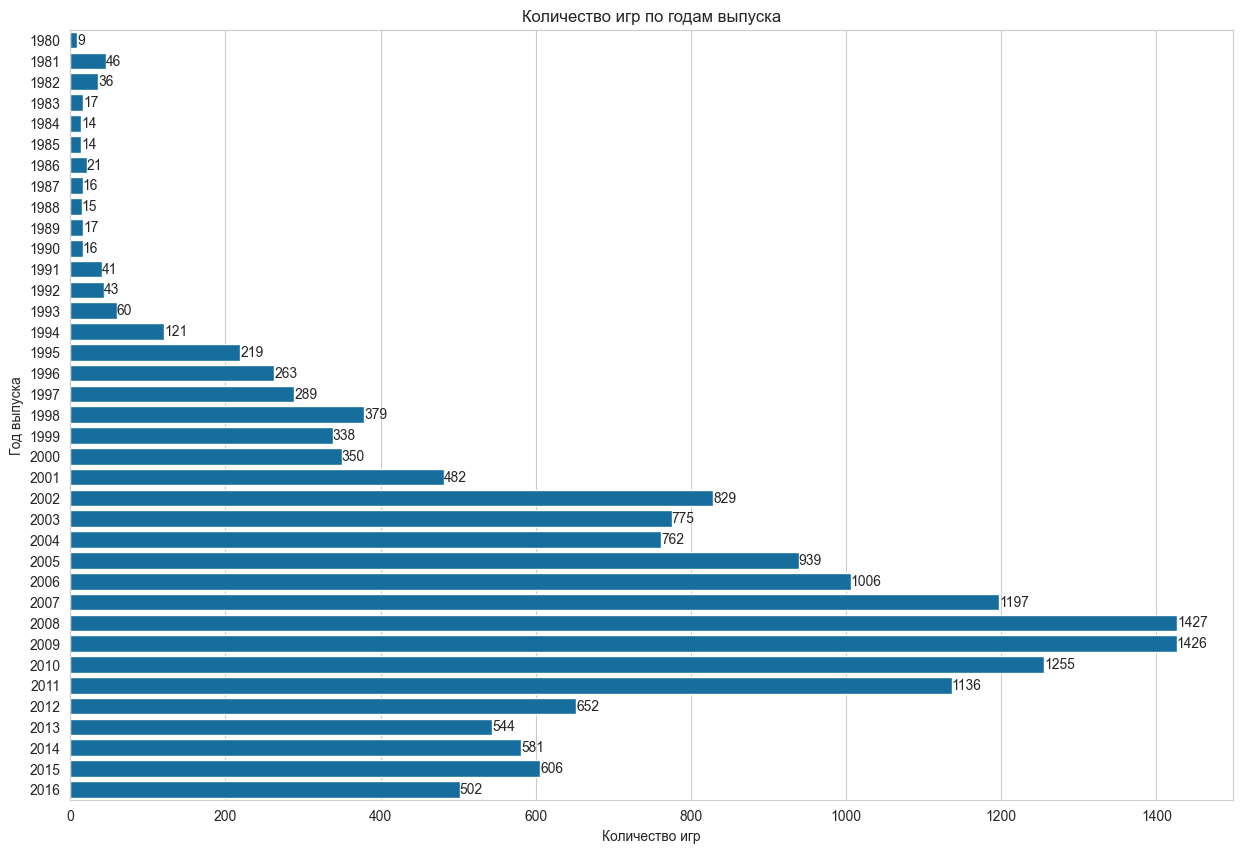

In [44]:
# установим цвет палитры
sns.set_palette("colorblind")
# утановим стиль с белой сеткой
sns.set_style("whitegrid")  
   
# построим горизонтальную столбчатую диаграмму о количестве выпущенных игр на каждый год
data_counts = data.pivot_table(index='year_of_release', 
                               values='name', 
                               aggfunc='count').reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(y=data_counts['year_of_release'].values, 
            x=data_counts['name'].values,  
            orient='h')

plt.xlabel('Количество игр')
plt.ylabel('Год выпуска')
plt.title('Количество игр по годам выпуска')

# добавление подписей к столбцам
for i, value in enumerate(data_counts['name']):
    plt.text(value, i, f'{value:}', ha='left', va='center')

plt.show()

**Вывод:**
На столбчатой диаграмме видно пик на 2008 и 2009 год. После 2011 наблюдается спад. До 2000 года количество выпускаемых игры было гораздо меньше, можно взять в выборку игры начиная с 2000 года. 

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим характерный срок когда появляются новые и исчезают старые платформы?

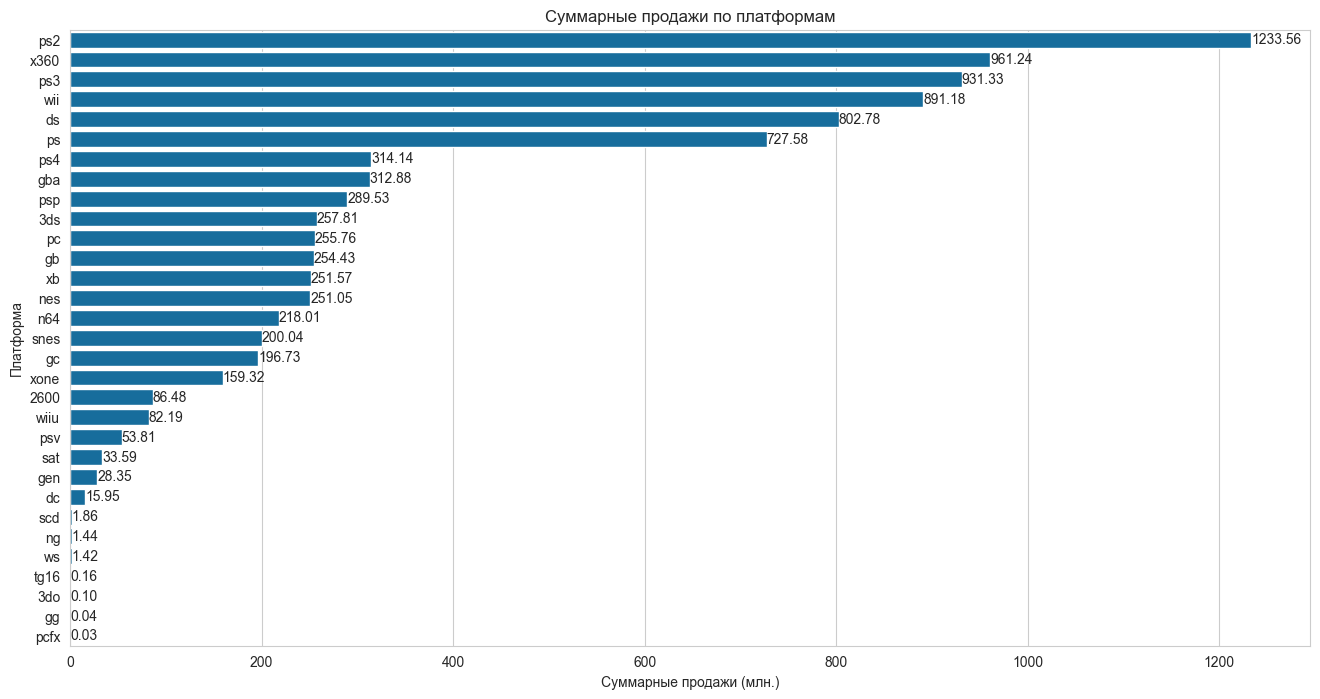

In [45]:
# # Построим горизонтальную столбчатую диаграмму о суммарном количестве проданых игр
platform_sales = data.pivot_table(index='platform', 
                                  values='all_sales', 
                                  aggfunc='sum')

platform_sales = platform_sales.sort_values(by='all_sales', ascending=False)

plt.figure(figsize=(16, 8))

sns.barplot(y=platform_sales.index, 
            x=platform_sales['all_sales'])

plt.ylabel('Платформа')
plt.xlabel('Суммарные продажи (млн.)')
plt.title('Суммарные продажи по платформам')

# Добавление подписей к столбцам с округлением до двух знаков после запятой
for i, value in enumerate(platform_sales['all_sales']):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()


**Вывод:**
Среди самых популрных платформ значатся PS2, X360, PS3, Wii, DS, PS. PS4 так же является не менее популярной приставкой, она вышла в 2016 году и еще не успела набрать такое количество продаж. Нам необходимо выбрать лидеров, у первых 6 консолей видно явноее преимущество, с ними и будем работать.

**Построим график за какой характерный срок появляются новые и исчезают старые платформы лидирующих платформ** 

In [46]:
top_sales = platform_sales.head(6).reset_index()  # Отдельно выведем 6 лидирующих консолей
top_sales

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.33
3,wii,891.18
4,ds,802.78
5,ps,727.58


In [47]:
# Добавим новый столбец, который будет посчитывать разницу между самой ранней и самой последней игрой для приставки
release_data = data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
release_data['time_existence'] = release_data['max'] - release_data['min']
release_data = release_data[release_data['platform'].isin(top_sales['platform'])]
release_data

,platform,min,max,time_existence
4,ds,1985,2013,28
15,ps,1994,2003,9
16,ps2,2000,2011,11
17,ps3,2006,2016,10
25,wii,2006,2016,10
28,x360,2005,2016,11


Все полученные данные, кроме приставки DS, выглядят нормально. Консоль DS вышла в 2004 году и значит, что максимально ей может быть 12 лет. Проверим данные по приставке DS за года до 2004.

In [48]:
data.loc[(data['year_of_release'] < 2004) & (data['platform'] == 'ds')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,-1,-1,unknown,0.02


Выявили одну аномальную строку, удалим ее.

In [49]:
# Удалим нужную строку из датасета
data = data.drop(data.loc[(data['year_of_release'] < 2004) & (data['platform'] == 'ds')].index)

In [50]:
# Проверим данные после обработки
release_data = data.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
release_data['time_existence'] = release_data['max'] - release_data['min']
release_data = release_data[release_data['platform'].isin(top_sales['platform'])]
release_data

,platform,min,max,time_existence
4,ds,2004,2013,9
15,ps,1994,2003,9
16,ps2,2000,2011,11
17,ps3,2006,2016,10
25,wii,2006,2016,10
28,x360,2005,2016,11


Теперь данные верные. Построим графики для каждой приставки 

<Figure size 800x500 with 0 Axes>

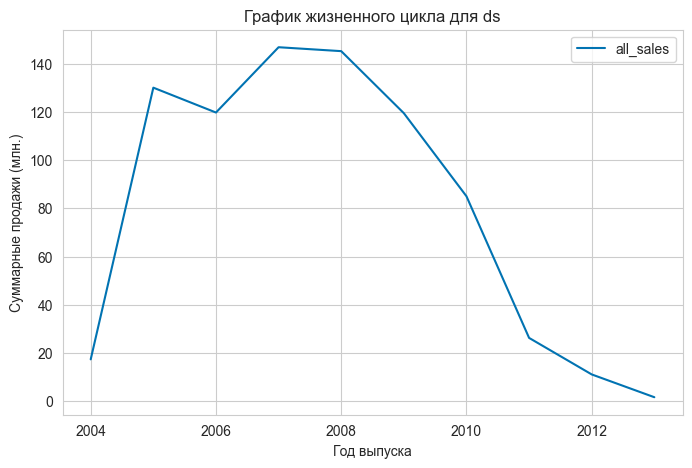

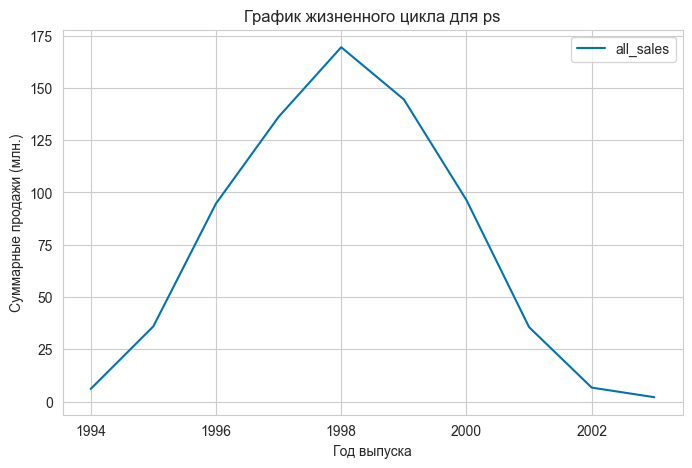

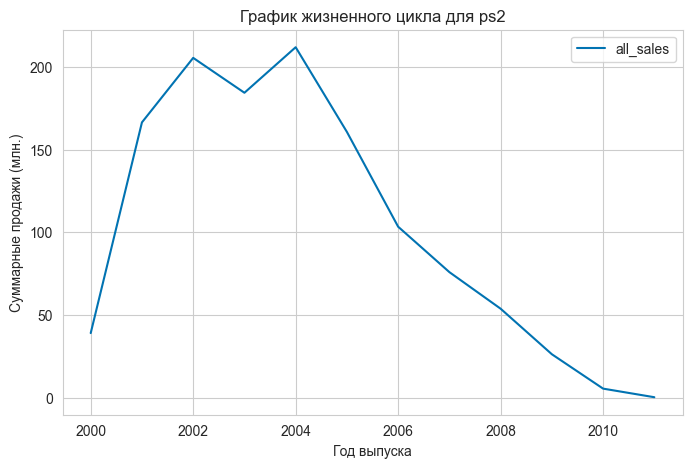

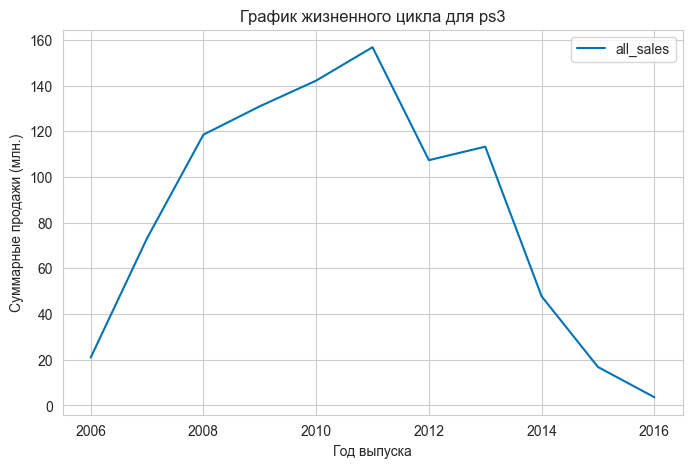

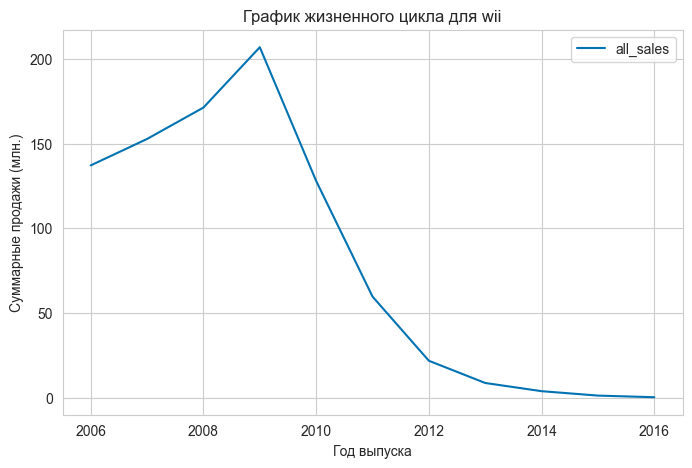

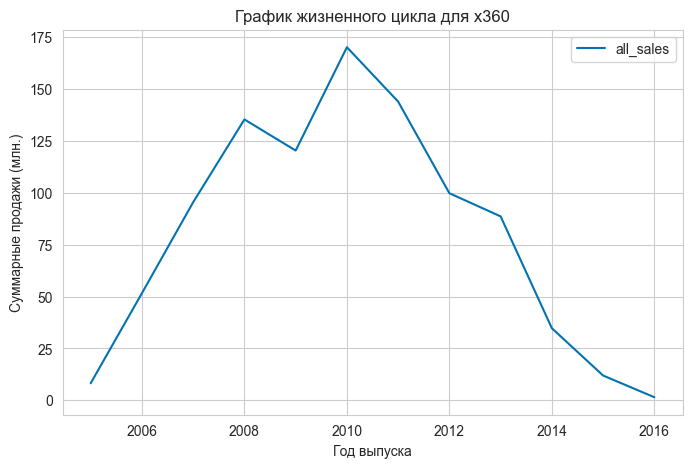

In [51]:
# Построим графики жизненного цикла шести платформ с максимальными продажами
plt.figure(figsize=(8, 5))

for i in release_data['platform']:
    (
        data.query(f'platform == @i')
        .pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
        .sort_values('year_of_release', ascending=False)
        .plot(title=f'График жизненного цикла для {i}', grid=True, figsize=(8, 5))
    )
    
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи (млн.)')
plt.show()

**Вывод:**
В ходе проведения исследовательского анализа мы выявиди 6 самых популярных платформ и их жизненный цикл.Среди самых популрных платформ значатся PS2, X360, PS3, Wii, DS, PS.

Определим медианный срок жизненного цикла всех консолей.

In [52]:
long_life_data = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
long_life_data['time_existence'] = long_life_data['max'] - long_life_data['min']
life = long_life_data['time_existence'].median()
print(f'Медианный жизненный цикл по всем консолям с 1980 по 2016 год, составляет: {life} лет')

Медианный жизненный цикл по всем консолям с 1980 по 2016 год, составляет: 6.0 лет


**Так как медианный жизненный цикл консолей составляет 6 лет, актуальными данными будем считать последние 4 года. Так как по графикам среди самых популярных консолей видно, что пиковое значение приходится примерно на середину цикла. Для того, что бы построить прогнозы на 2017 год**

In [53]:
# оставим для анализа только актуальные данные
actual_data = data.query('year_of_release >= 2013')
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,unknown,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62


In [54]:
# проверим как получился срез
actual_data['year_of_release'].unique() 

array([2013, 2015, 2014, 2016])

#### Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [55]:
# таблица с данными о кол-ве проданных игр в зависимости от года
sales_years_platform = (
    actual_data.pivot_table(index=['platform', 'year_of_release'], 
                            values= 'all_sales', aggfunc='sum')
    .reset_index()
)

In [56]:
sales_years_platform

,platform,year_of_release,all_sales
0,3ds,2013,56.57
1,3ds,2014,43.76
2,3ds,2015,27.78
3,3ds,2016,15.14
4,ds,2013,1.54
5,pc,2013,12.38
6,pc,2014,13.28
7,pc,2015,8.52
8,pc,2016,5.25
9,ps3,2013,113.25


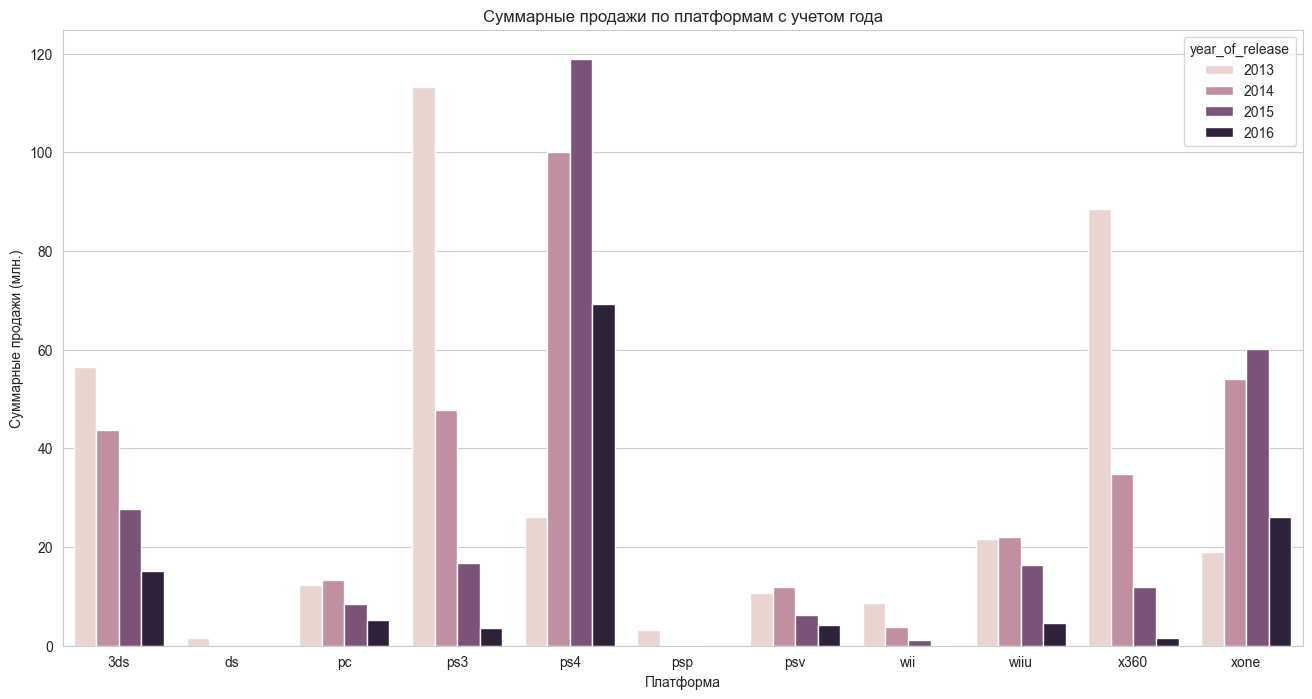

In [57]:
# Построим и сгрупируем столбцы на графике для каждой платформы в зависимости от года   
plt.figure(figsize=(16, 8))


sns.barplot(y=sales_years_platform['all_sales'].values,
            x='platform', 
            hue='year_of_release',
            data=sales_years_platform)

plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Суммарные продажи по платформам с учетом года')
plt.show()

In [58]:
# Создаем сводную таблицу с суммарными продажами по платформам
sales_by_platform = (
    actual_data.pivot_table(index='platform', 
                            values='all_sales', 
                            aggfunc='sum')
    .sort_values(by='all_sales')
    .reset_index()
)

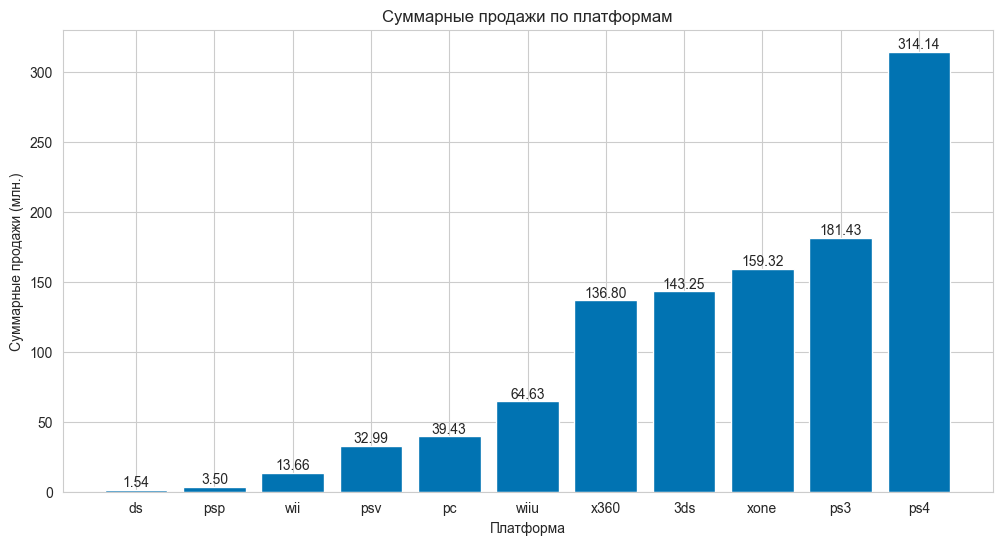

In [59]:
# Построим столбчатую диаграмму по суммарным продажам, для каждой платформы
plt.figure(figsize=(12, 6))
plt.bar(sales_by_platform['platform'], sales_by_platform['all_sales'])
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('Суммарные продажи по платформам')

for i, value in enumerate(sales_by_platform['all_sales']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

**Вывод:**
Проведя исследовательский анализ данных видно, что:

Пик платфомы 3DS уже прошел и идет на спад
DS перестала выпускать и продавать игры в 2013 году
Платформа PC относительно игровых консолей имеет не высокие продажи
Приставка PS3 в 2013 году показывала отличные показатели, затем после появления PS4 ее показатели сильно упали, а у PS4 наоборот, стали возрастать. PS4 имеет самые высокие показатели за 2014-2016 год. PSP и PSV приставка, так же относящаяся к SONY имеет низкие показатели продажи, это говорить о том, что компания не развивает это платформу
Платформа Wii показывает спад, ее поддержку прекратили в 2013 году. WiiU пришла на замену прошлого поколения в 2012 году и сначала улучшила показатели прошлого поколения, но затем пошла на спад.
X360 была на рынке уже с 2005 года и к 2013 уже считалась устаревшей, несмотря на это показывала не плохие показатели. В 2013 году вышла XOne, которые показывал не плохие результаты.

За последние 4 года, явным лидером является PS4. PS3 показывает второй результат, но дальше показатели будут только падать, так как есть новое поколение. XOne является актуальным поколение и показывает средние результаты.

Если посмотреть на таблицу в целом, то 2016 год для всех является упадочным, нет явно перспективных платформ, однако PS4 и XOne можно считать перспективными в мире консолоей. Эти платформы являются главными конкурентами и их актуальные приставки уже прошли половину жизненного цикла, прик проходит, возможно из за ожидания выхода новых приставок, Возможно в 2016 было достигнуто насыщение насыщения в игровой индустрии, что привело к уменьшению спроса на новые игры. Либо производили новых и интересных проектов откладывали выход своих игр, в ожидании новых поколений. Так же возможны и экономические факторы, такие как спад потребительского спроса, ухудшение финансовой стабильности потребителей. Несмотря на вышесказанное PS4 и XOne можно считать потенциально прибыльными консолями.

Если рассмотреть мир портативных консолей, к таким относятся: DS, PSP, Wii, PSV, WiiU, 3DS количество проданных, игры на них, намного меньше, чем обычных игровых приставках - это говорит о меньшей популярности. Однако, среди них можно выявить самую популярную - 3DS, она обогнала все портативные приставки и X360. Думаю, ее так же можно считать потенциально прибыльной консолью.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

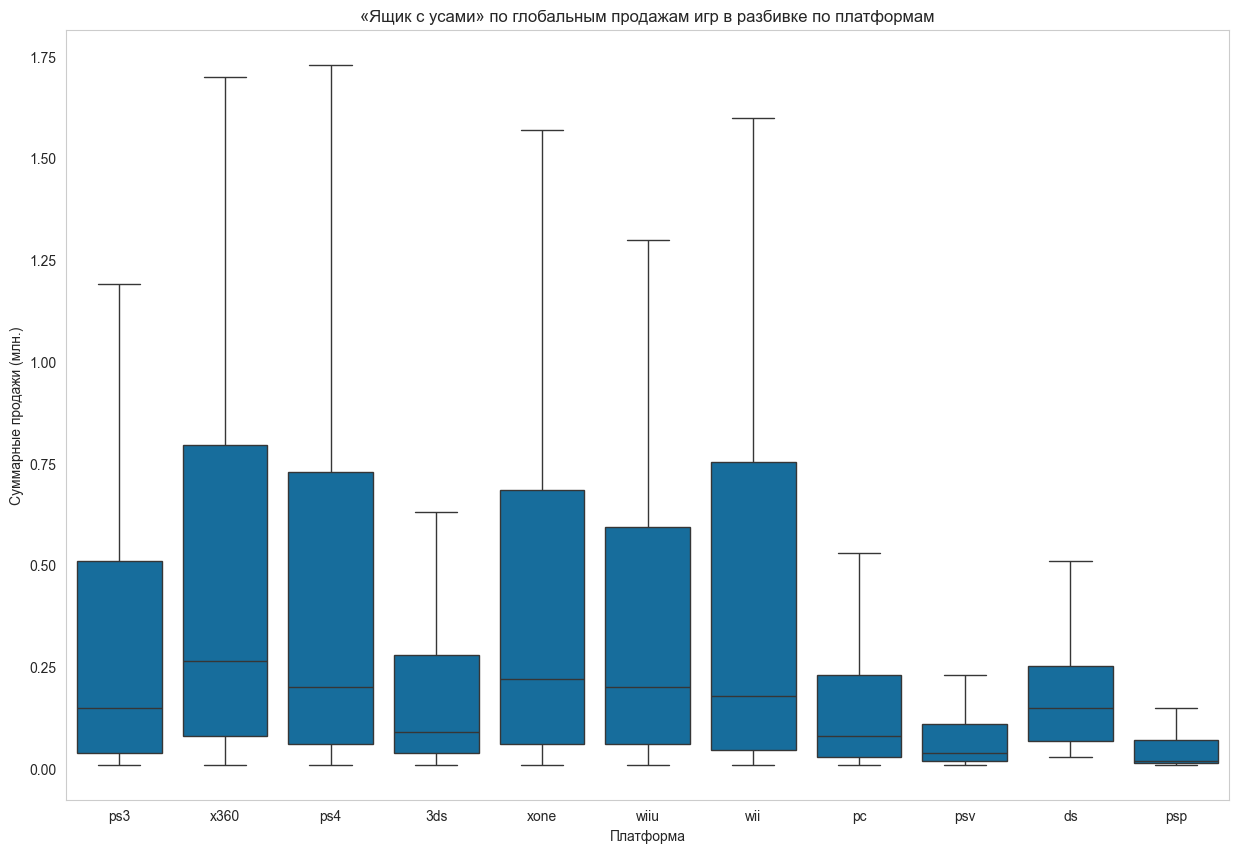

In [60]:
# Построим график «ящик с усами»
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='all_sales', data=actual_data, showfliers=False)
plt.grid(axis='y')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн.)')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.show()

**Вывод:**

На "ящике с усами" видно, что все консоли имеют вбросы, сильно отличающиеся от медианного значения. Наибольшее медианное значение приходится на платформу X360 следом XOne и PS4. Первый квартиль находится примерно на одном уровне, с небольшими отклонениями. Третий квартиль самый большой у X360. Самые низкие показатели имеет PSP.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [61]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,unknown,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62


In [62]:
# Выберем самую популярную платформу ps4
ps_4 = actual_data.query("platform == 'ps4'") 

Диаграмма рассеяния для PS4


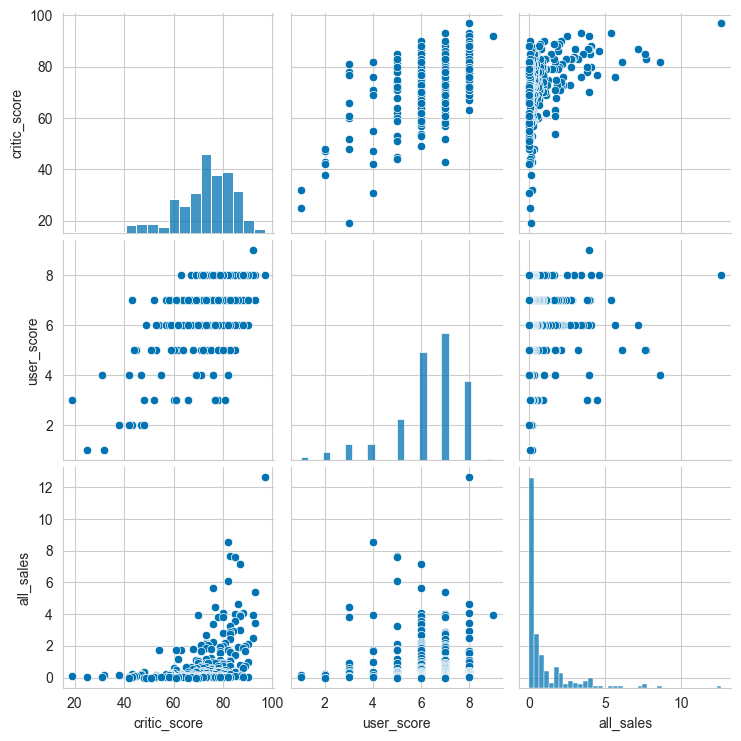

In [63]:
print('Диаграмма рассеяния для PS4')
filtered_data = ps_4.query('critic_score != -1 and user_score != -1')
sns.pairplot(filtered_data[['critic_score', 'user_score', 'all_sales']])
plt.show()

**По диаграмме рассеяния не видно сильных зависимостей, видна положительная корреляция количества продаж от оценок критиков. Корреляция отзывов пользователей и количества продаж так же присутствует, но более слабая.**

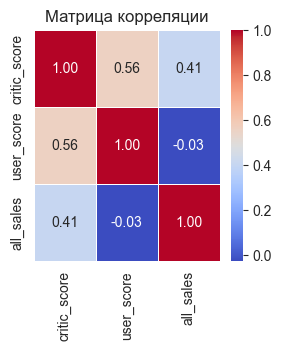

In [64]:
# Построим тепловую карту для отзывов и количества продаж
plt.figure(figsize=(3, 3))

sns.heatmap(filtered_data[['critic_score', 'user_score', 'all_sales']].corr(), 
            annot=True, 
            cmap='coolwarm',
            linewidth=0.5,
            fmt=".2f") 
plt.title('Матрица корреляции')
plt.show()

**Вывод:** В данном случае для консолей PS4, если рассматривать переменные critic_score и all_sales, то значение 0.41 указывает на то, что с увеличением оценки критиков (critic_score) вероятнее всего увеличится объем продаж игры (all_sales). Корреляция в значении 0.41 говорит о наличии умеренной положительной линейной связи между двумя переменными.

Если рассматривать переменные critic_score и all_sales, то значение -0.03 говорит о том, что между двумя переменными, для которых рассчитана корреляция, практически отсутствует линейная зависимость. В данном случае корреляция близка к нулю и можно считать, что переменные не связаны друг с другом линейно.

**Соотнесем выводы с продажами игр на других платформах.**

Строим диаграмму рассеяния ps3


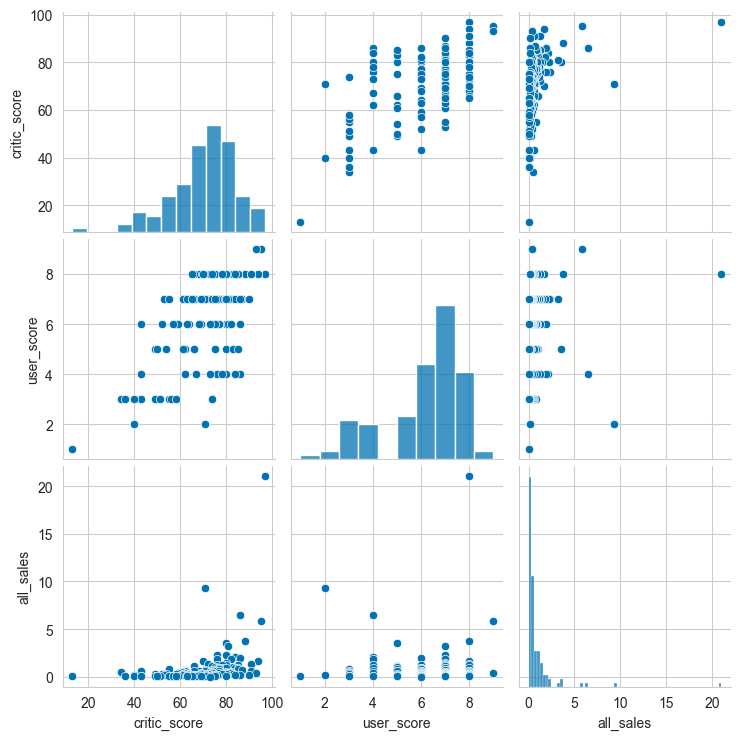

Строим диаграмму рассеяния x360


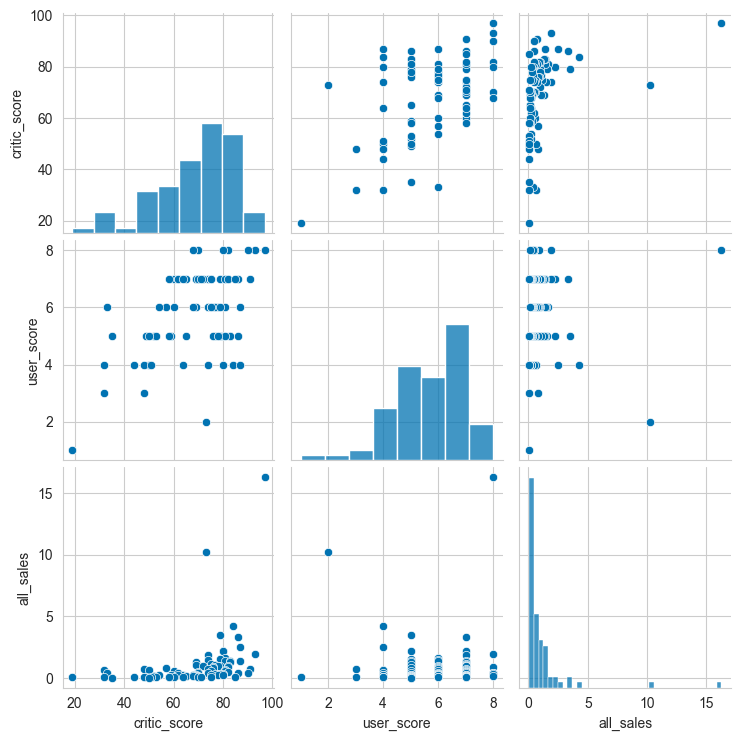

Строим диаграмму рассеяния ps4


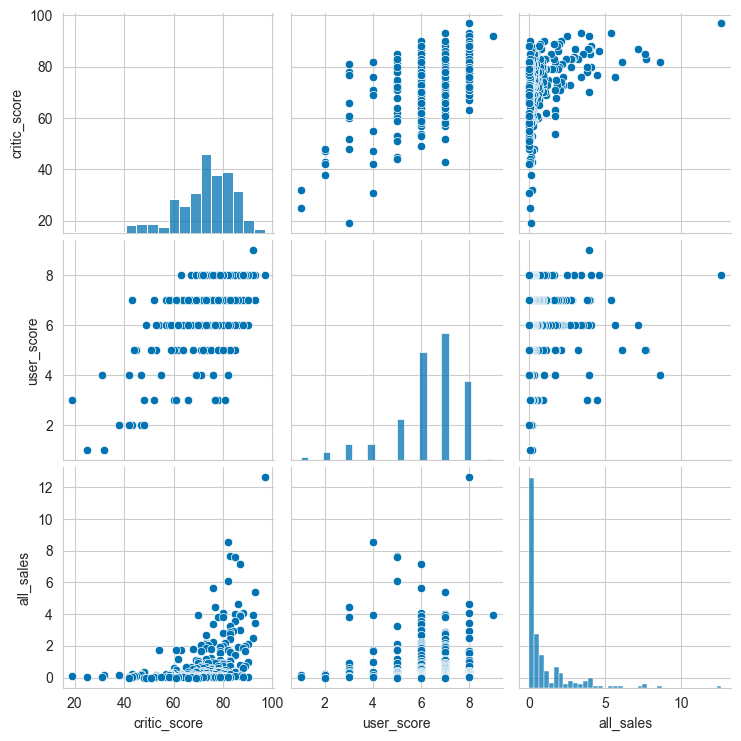

Строим диаграмму рассеяния 3ds


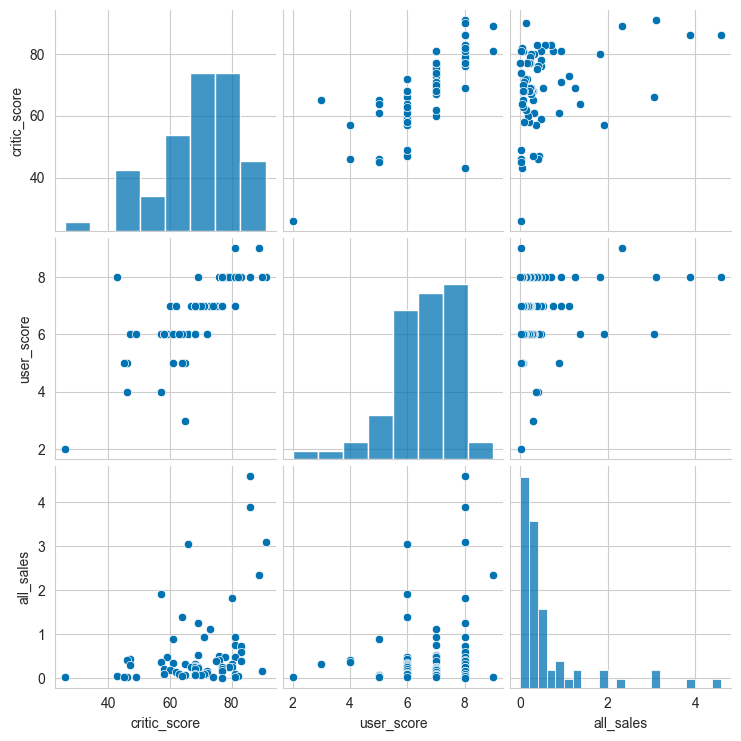

Строим диаграмму рассеяния xone


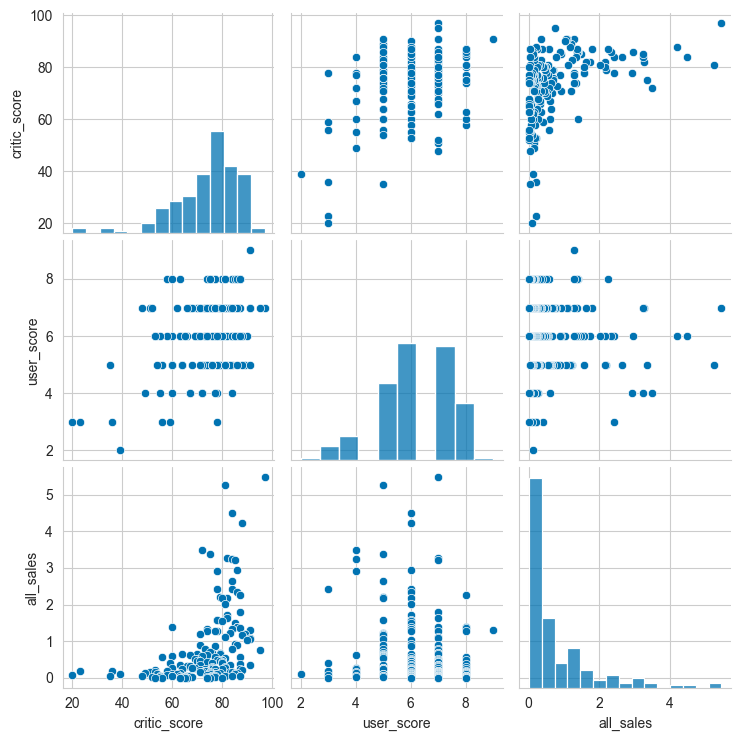

Строим диаграмму рассеяния wiiu


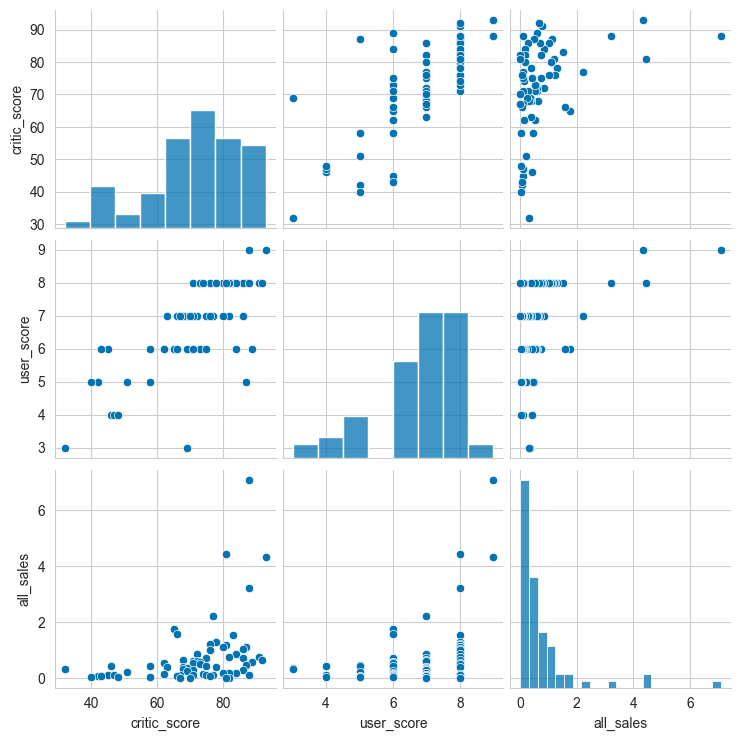

Строим диаграмму рассеяния wii


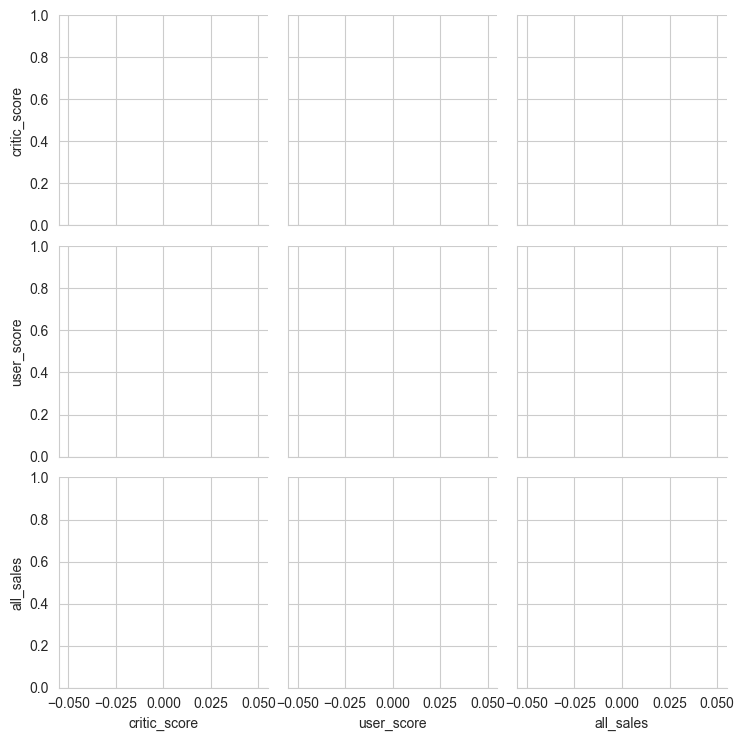

Строим диаграмму рассеяния pc


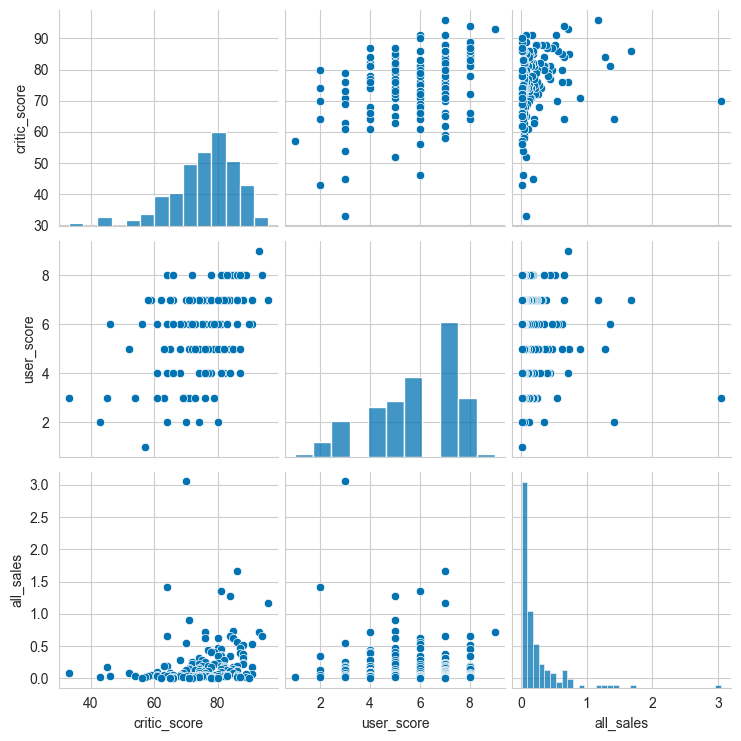

Строим диаграмму рассеяния psv


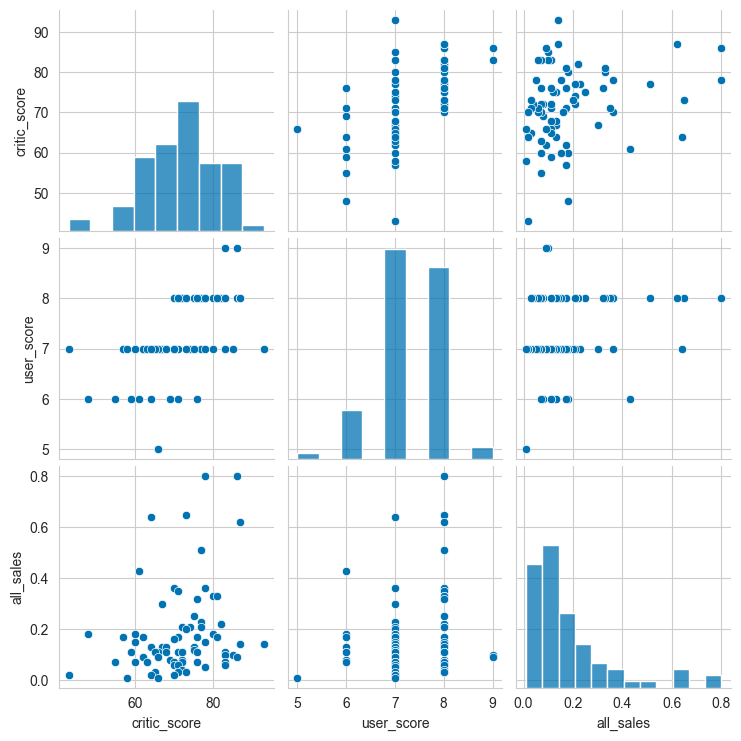

Строим диаграмму рассеяния ds


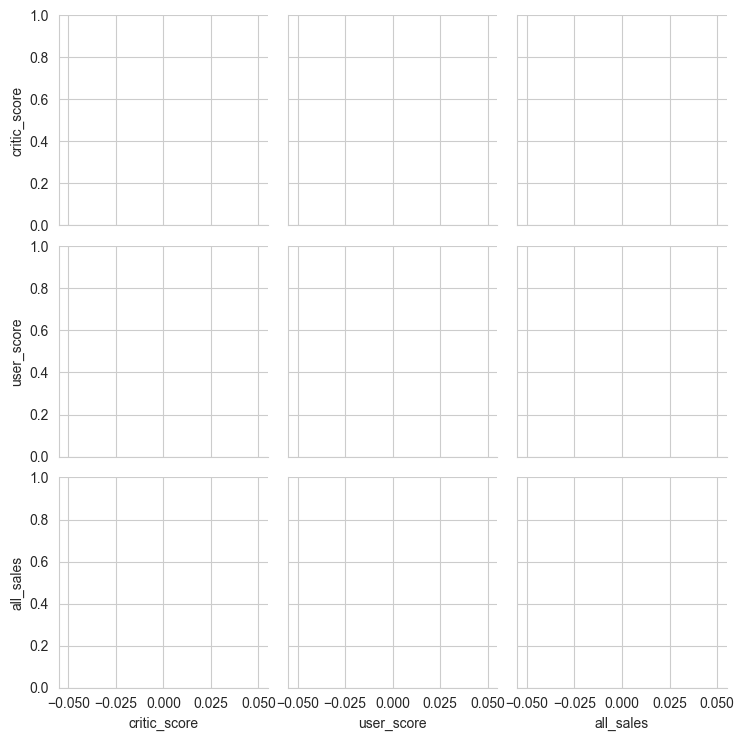

Строим диаграмму рассеяния psp


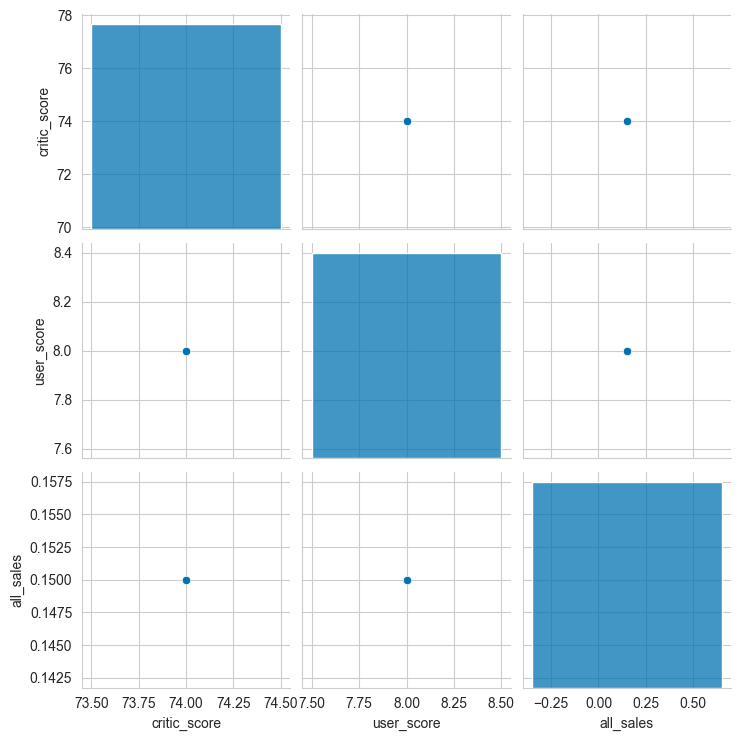

In [65]:
# создадим список платформ
platforms = list(actual_data['platform'].unique())
# построим цикл для построения тепловых карт для каждой платформы 
for platform in platforms:
    print(f'Строим диаграмму рассеяния {platform}')
    plat_data = actual_data.query("platform == @platform and critic_score != -1 and user_score != -1")
    sns.pairplot(plat_data[['critic_score', 'user_score', 'all_sales']])
    
    plt.show()

Строим диаграмму рассеяния ps3


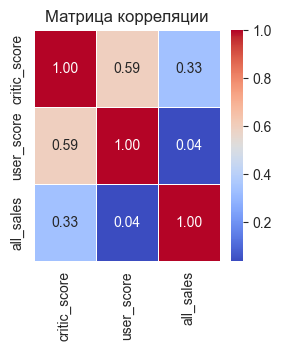

Строим диаграмму рассеяния x360


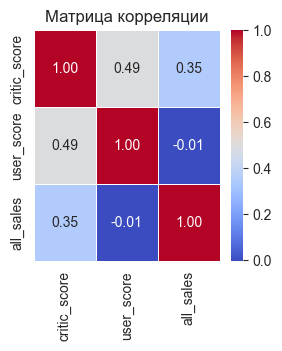

Строим диаграмму рассеяния ps4


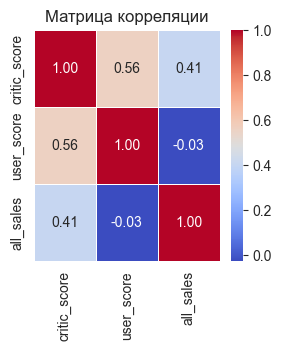

Строим диаграмму рассеяния 3ds


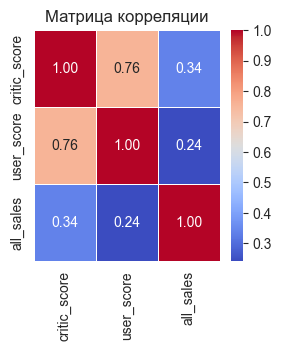

Строим диаграмму рассеяния xone


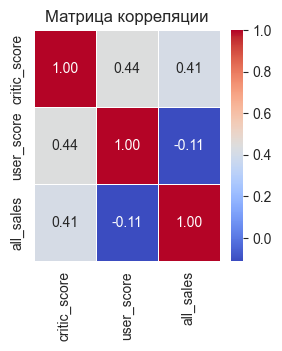

Строим диаграмму рассеяния wiiu


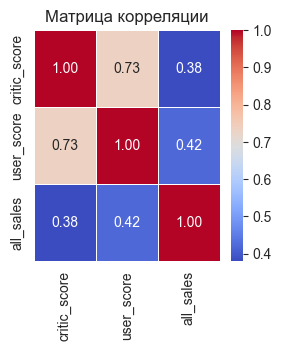

Строим диаграмму рассеяния wii


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


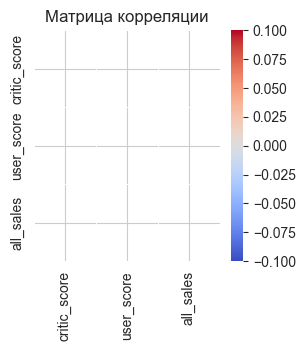

Строим диаграмму рассеяния pc


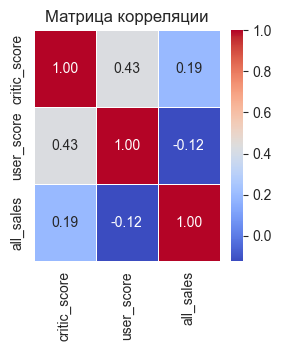

Строим диаграмму рассеяния psv


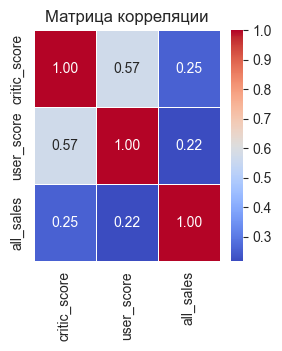

Строим диаграмму рассеяния ds


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


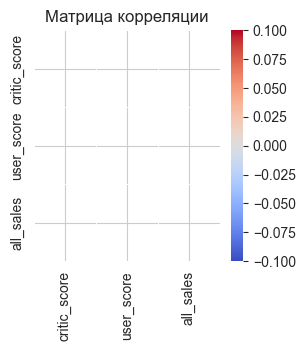

Строим диаграмму рассеяния psp


/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/envs/practicum/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


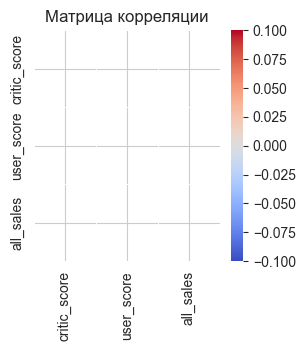

In [66]:
# построим цикл для построения тепловых карт для каждой платформы 
for platform in platforms:
    plt.figure(figsize=(3, 3))
    print(f'Строим диаграмму рассеяния {platform}')
    platform_heat = actual_data.query("platform == @platform and critic_score != -1 and user_score != -1")
    sns.heatmap(platform_heat[['critic_score', 'user_score', 'all_sales']].corr(), 
                annot=True, 
                cmap='coolwarm',
                linewidth=0.5,
                fmt=".2f") 
    plt.title('Матрица корреляции')
    plt.show()

In [67]:
(actual_data.loc[(actual_data['platform'] == 'Wii') 
                 & (actual_data['critic_score'] != -1) 
                 & (actual_data['user_score'] != -1)]
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


In [68]:
(actual_data.loc[(actual_data['platform'] == 'DS') 
                 & (actual_data['critic_score'] != -1) 
                 & (actual_data['user_score'] != -1)]
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


In [69]:
(actual_data.loc[(actual_data['platform'] == 'PSP') 
                 & (actual_data['critic_score'] != -1) 
                 & (actual_data['user_score'] != -1)]
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


Для трех платформ: PSP, DS, Wii не построились тепловые карты, оценки на этих платформах мы изменяли на предобработке данных, для них мы задавали значение -1, что является не точными данными, поэтому мы не включили их в анализ.

**Вывод:** Исходя из анализа тепловых карт и диаграмм рассеяния, можно сделать вывод, что оценки критиков оказывают некоторое влияние на объемы продаж игр. Наиболее заметное влияние оценок критиков наблюдается на платформах PS4 и XOne, где коэффициент корреляции составляет 0.41, указывая на положительную связь между оценками критиков и успешностью продаж игр. В то же время, на платформах 3DS и WiiU влияние оценок пользователей на объемы продаж игр оказывается менее значительным, со значениями коэффициента корреляции 0.24 и 0.42 соответственно. Это может говорить о том, что на данных платформах другие факторы могут оказывать более существенное влияние на успешность продаж игр, отличные от оценок пользователей.

#### Посмотрим на общее распределение игр по жанрам.

In [70]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,grand theft auto v,ps3,2013,Action,7.02,9.09,0.98,3.96,97,8,M,21.05
23,grand theft auto v,x360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1,unknown,14.60
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97,8,M,12.62


In [71]:
# Сгрупируем игры по жанру и общему количеству проданых игр
genre_data = (
    actual_data.pivot_table(index='genre',
                            values='all_sales', 
                            aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
)
genre_data.reset_index()

,genre,all_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Исходя из данных о продажах игр различных жанров, можно сделать вывод, что самые популярные игры принадлежат к жанрам action, shooter и sports, с объемами продаж 321.87 млн., 232.98 млн. и 150.65 млн. копий соответственно. С другой стороны, наименее популярными являются игры жанров simulation (21.76 млн.), strategy (10.08 млн.) и puzzle (3.17 млн.), которые, возможно, более ориентированы на детскую аудиторию. 

**Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи. Лучше всего нам это покажет boxplot.**

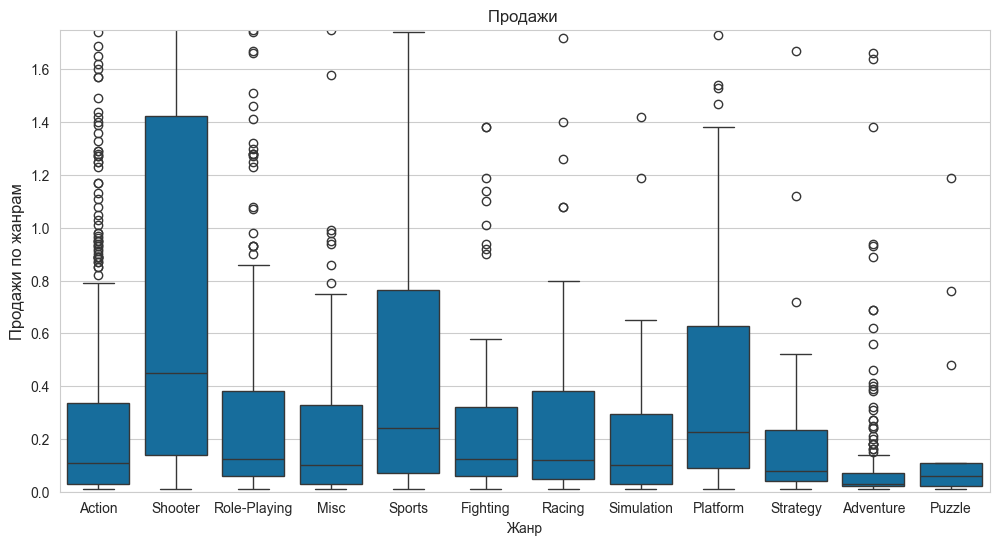

In [72]:
# Построим диаграмму размаха для поиска наиболее прибыльного жанра.
plt.figure(figsize=(12,6));
ax = sns.boxplot(data=actual_data, x='genre', y='all_sales');
ax.set(ylim=(0, 1.75));
plt.title('Продажи ');
plt.xlabel('Жанр');
plt.ylabel('Продажи по жанрам',fontsize=12);

**Вывод:**
Исследование и сравнение медианных значений продаж по различным жанрам видеоигр показывает, что жанры Shooter и Sports имеют наибольшие медианные значения продаж. Их квартильный размах так же самый большой. Это означает, что игры в этих жанрах в среднем приносят больше прибыли, чем игры в других жанрах. Данные о продажах игр различных жанров могут отражать предпочтения различных возрастных групп пользователей и их влияние на объемы продаж в соответствующих категориях игр. Таким образом, можно сделать вывод, что предпочтение стоит отдавать играм в жанрах Shooter и Sports для максимизации прибыли. 


###  Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияние рейтинга ESRB на продажи в отдельном регионе


NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

**Определим самы популярные платформы (топ-5), для каждого региона.**

In [97]:
# Построим таблицу с самыми популярными платформами для Северной Америки
platform_top_na = (
    actual_data.pivot_table(index='platform',
                            values='na_sales', 
                            aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).reset_index()
)

total_sales = platform_top_na['na_sales'].sum()
platform_top_na['percentage, %'] = round((platform_top_na['na_sales'] / total_sales) * 100, 2)

platform_top_na_list = list(platform_top_na['platform'].head(5))
platform_top_na = platform_top_na.head(5)

,platform,na_sales,"percentage, %"
0,ps4,108.74,24.84
1,xone,93.12,21.27
2,x360,81.66,18.66
3,ps3,63.50,14.51
4,3ds,38.20,8.73


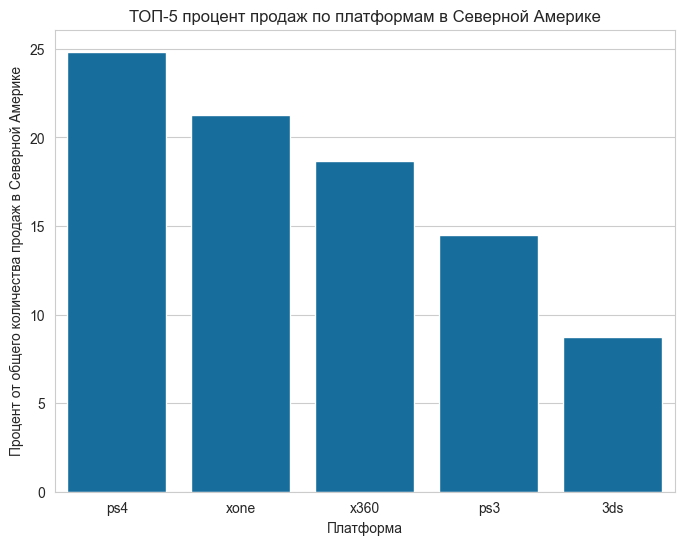

In [74]:
# визуализируем ТОП-5 платформ по проданным копиям
plt.figure(figsize=(8, 6))
sns.barplot(data = platform_top_na, 
            x='platform', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по платформам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Северной Америке');

In [75]:
print('Самыми популярными платформами в Северной Америке являются: ', platform_top_na_list )

Самыми популярными платформами в Северной Америке являются:  ['ps4', 'xone', 'x360', 'ps3', '3ds']


In [76]:
# Построим таблицу с самыми популярными платформами для Европы
platform_top_eu = (
    actual_data.pivot_table(index='platform',
                            values='eu_sales', 
                            aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).reset_index()
)

total_sales = platform_top_eu['eu_sales'].sum()
platform_top_eu['percentage, %'] = round((platform_top_eu['eu_sales'] / total_sales) * 100, 2)

platform_top_eu_list = list(platform_top_eu['platform'].head(5))
platform_top_eu = platform_top_eu.head(5)

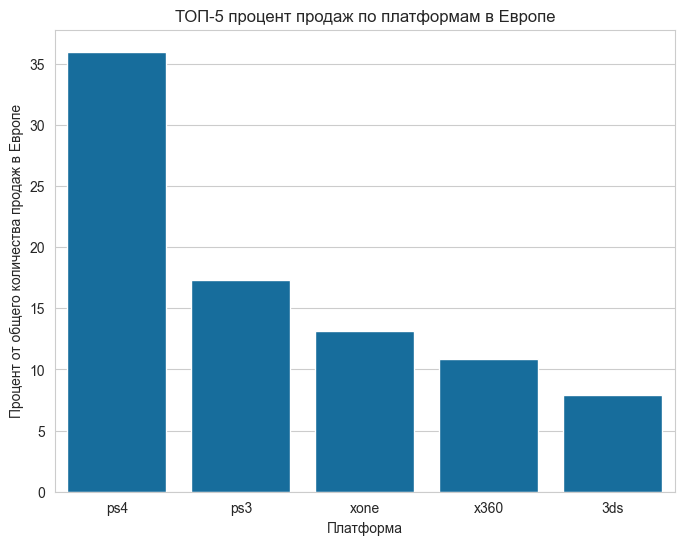

In [77]:
# визуализируем ТОП-5 платформ по проданным копиям
plt.figure(figsize=(8, 6))
sns.barplot(data = platform_top_eu, 
            x='platform', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по платформам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Европе');

In [78]:
print('Самыми популярными платформами в Европе являются: ', platform_top_eu_list )

Самыми популярными платформами в Европе являются:  ['ps4', 'ps3', 'xone', 'x360', '3ds']


In [98]:
# Построим таблицу с самыми популярными платформами для Японии
platform_top_jp = (
    actual_data.pivot_table(index='platform',
                            values='jp_sales', 
                            aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).reset_index()
)

total_sales = platform_top_jp['jp_sales'].sum()
platform_top_jp['percentage, %'] = round((platform_top_jp['jp_sales'] / total_sales) * 100, 2)

platform_top_jp_list = list(platform_top_jp['platform'].head(5))
platform_top_jp = platform_top_jp.head(5)

,platform,jp_sales,"percentage, %"
0,3ds,67.81,48.17
1,ps3,23.35,16.59
2,psv,18.59,13.21
3,ps4,15.96,11.34
4,wiiu,10.88,7.73


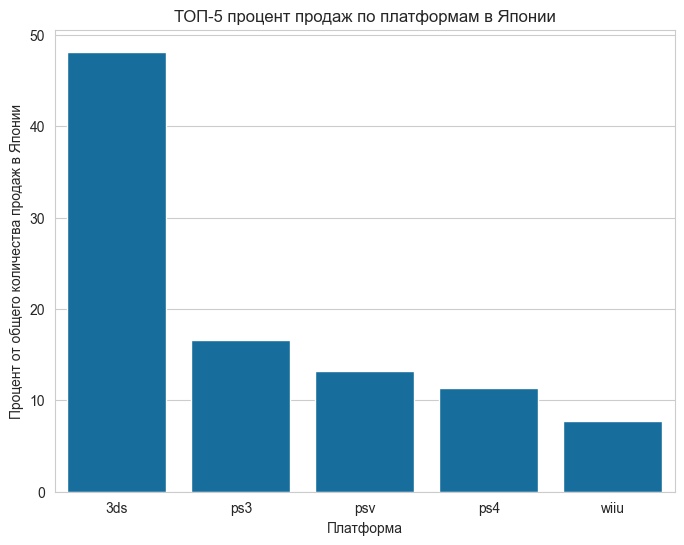

In [80]:
# визуализируем ТОП-5 платформ по проданным копиям
plt.figure(figsize=(8, 6))
sns.barplot(data = platform_top_jp, 
            x='platform', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по платформам в Японии')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Японии');

In [81]:
print('Самыми популярными платформами в Японии являются: ', platform_top_jp_list )

Самыми популярными платформами в Японии являются:  ['3ds', 'ps3', 'psv', 'ps4', 'wiiu']


**Определим самы популярные жанры (топ-5), для каждого региона.**

In [82]:
genre_top_na = (
    actual_data.pivot_table(index='genre',
                            values='na_sales', 
                            aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).reset_index()
)

total_sales = genre_top_na['na_sales'].sum()
genre_top_na['percentage, %'] = round((genre_top_na['na_sales'] / total_sales) * 100, 2)

genre_top_na_list = list(genre_top_na['genre'].head(5))
genre_top_na = genre_top_na.head(5)

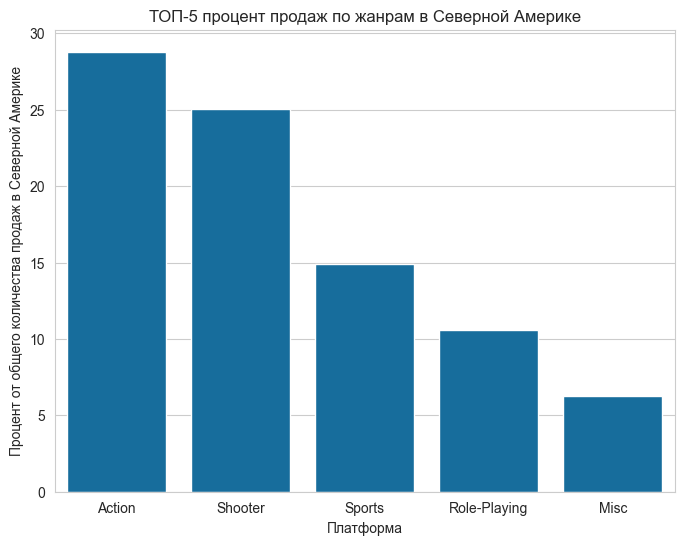

In [83]:
# визуализируем ТОП-5 жанров 
plt.figure(figsize=(8, 6))
sns.barplot(data = genre_top_na, 
            x='genre', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по жанрам в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Северной Америке');

In [84]:
print('Самыми популярными жанрами в Северной Америке являются: ', genre_top_na_list )

Самыми популярными жанрами в Северной Америке являются:  ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [85]:
genre_top_eu = (
    actual_data.pivot_table(index='genre',
                            values='eu_sales', 
                            aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).reset_index()
)

total_sales = genre_top_eu['eu_sales'].sum()
genre_top_eu['percentage, %'] = round((genre_top_eu['eu_sales'] / total_sales) * 100, 2)

genre_top_eu_list = list(genre_top_eu['genre'].head(5))
genre_top_eu = genre_top_eu.head(5)

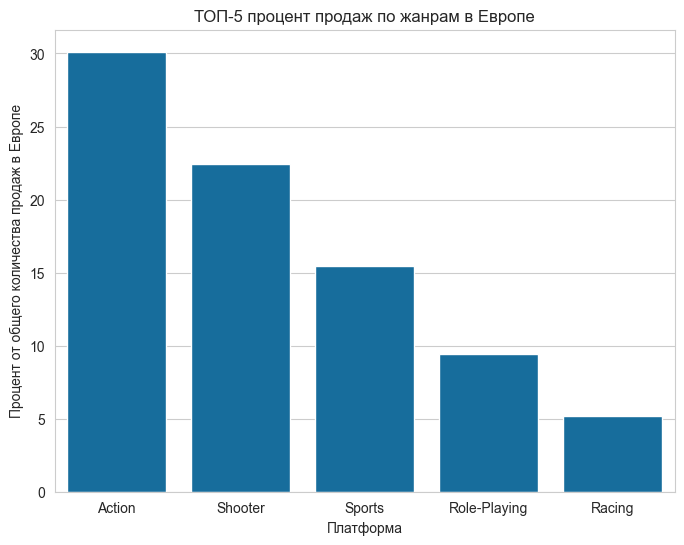

In [86]:
# визуализируем ТОП-5 жанров 
plt.figure(figsize=(8, 6))
sns.barplot(data = genre_top_eu, 
            x='genre', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по жанрам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Европе');

In [87]:
print('Самыми популярными жанрами в Европе являются: ', genre_top_eu_list )

Самыми популярными жанрами в Европе являются:  ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']


In [88]:
genre_top_jp = (
    actual_data.pivot_table(index='genre',
                            values='jp_sales', 
                            aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).reset_index()
)

total_sales = genre_top_jp['jp_sales'].sum()
genre_top_jp['percentage, %'] = round((genre_top_jp['jp_sales'] / total_sales) * 100, 2)

genre_top_jp_list = list(genre_top_jp['genre'].head(5))
genre_top_jp = genre_top_jp.head(5)

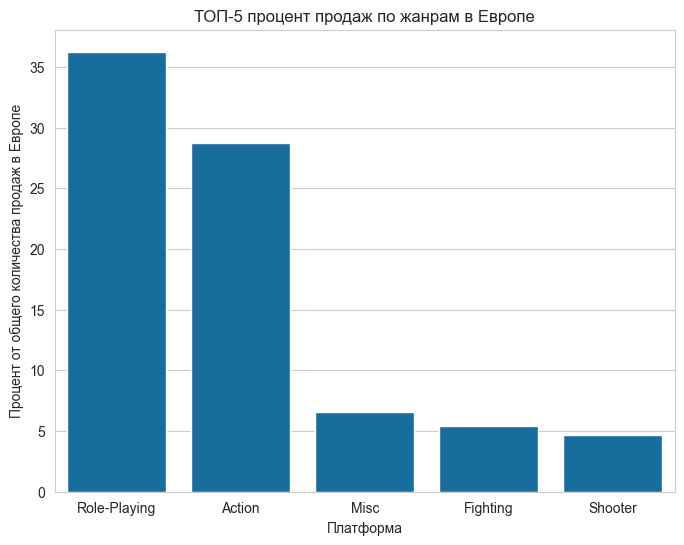

In [89]:
# визуализируем ТОП-5 жанров 
plt.figure(figsize=(8, 6))
sns.barplot(data = genre_top_jp, 
            x='genre', 
            y='percentage, %')

# добавим подписи осей
plt.title('ТОП-5 процент продаж по жанрам в Европе')
plt.xlabel('Платформа')
plt.ylabel('Процент от общего количества продаж в Европе');

In [90]:
print('Самыми популярными жанрами в Японии являются: ', genre_top_jp_list )

Самыми популярными жанрами в Японии являются:  ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']


**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [91]:
rating_top = (
    actual_data.pivot_table(index='rating',
                            values=['na_sales', 'eu_sales', 'jp_sales'], 
                            aggfunc={'na_sales' : 'sum',
                                      'eu_sales' : 'sum',
                                      'jp_sales' : 'sum'})
).reset_index()

rating_top

,rating,eu_sales,jp_sales,na_sales
0,E,83.36,15.14,79.05
1,E10+,42.69,5.89,54.24
2,M,145.32,14.11,165.21
3,T,41.95,20.59,49.79
4,unknown,78.91,85.05,89.42


In [92]:
# трансформируем таблицу в вертикальный формат
df_melted = rating_top.melt(id_vars='rating', var_name='region', value_name='sales')

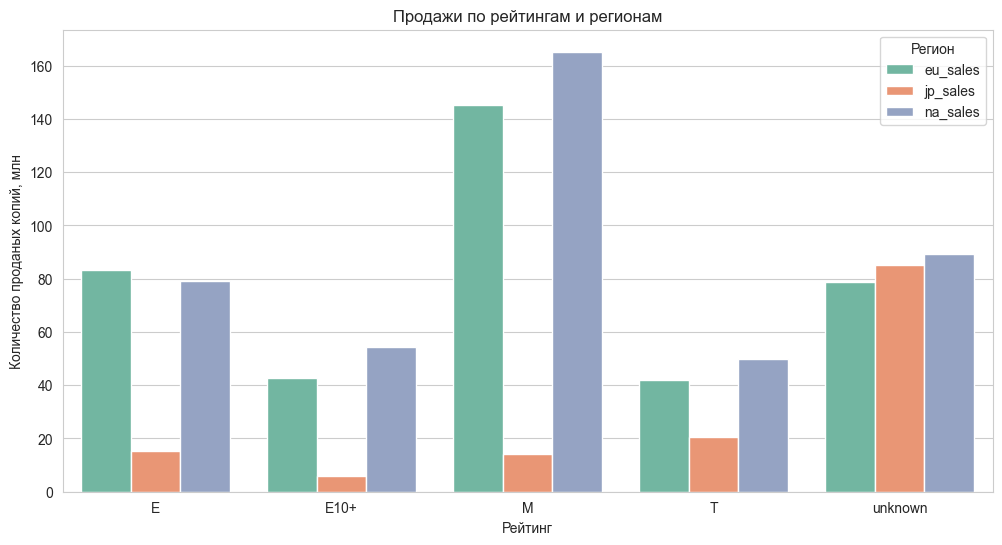

In [99]:
# построение столбчатой диаграммы с Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='sales', hue='region', data=df_melted, palette='Set2')

plt.title('Продажи по рейтингам и регионам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданых копий, млн')
plt.legend(title='Регион')
plt.show()

**Вывод:**
Проанализировав данные по разным регионам продаж, составим прортрет пользователей, для каждого региона:

- Пользователи Северной Америки предпочитают:
    - играть в платформы: PS4, XOne, X360, PS3, 3DS 
    - любимыми жанрами являются: Action, Shooter, Sports, Role-Playing, Misc
    - самый популярный рейтинг игр - М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь.)
- Пользователи Европы предпочитают:
    - играть в платформы: PS4, PS3, XOne, X360, 3DS 
    - любимыми жанрами являются: Action, Shooter, Sports, Role-Playing, Racing
    - самый популярный рейтинг игр - М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь.)
- Пользователи Японии предпочитают:
    - играть в платформы: 3DS, PS3, PSV, PS4, WiiU 
    - любимыми жанрами являются: Role-Playing, Action, Misc, Fighting, Shooter
    - не удалось однозначно определить самый популярный рейтинг игр в Японии из-за большого количества пропусков в данных. Однако, при использовании только достоверных данных, рейтинг Т (для лиц старше 13 лет) оказывается предпочтительным на японском рынке.

Этот анализ позволяет увидеть различия в предпочтениях пользователей видеоигр в разных регионах и выделить основные тенденции в каждом из них.

### Проверим гипотезы

**Гпотеза 1**

Нулевая гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC равны;

Альтернативная гипотеза:

- Средние пользовательские рейтинги платформ Xbox One и PC не равны;

In [95]:
alpha = 0.05 # уровень статистической значимости

# Возьмем две выборки для pc и xbox
pc = actual_data.query('platform == "PC"')
xone = actual_data.query('platform == "XOne"')

# Проведем ttest для двух независимых выборок
results = st.ttest_ind(pc['user_score'], xone['user_score'])

print('p-значение:', results.pvalue)

print('Среднее первой выборки', np.mean(pc['user_score']))
print('Среднее второй выборки', np.mean(xone['user_score']))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: nan
Среднее первой выборки nan
Среднее второй выборки nan
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value= 27% - это больше чем уровень статической значимости, поэтому не получается опровергнуть нулевую гипотезу. Есть основания говорить, средние пользовательские рейтинги платформ Xbox One и PC равны.

**Гипотеза 2**

Нулевая гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза:
- Средние пользовательские рейтинги жанров Action и Sports не равны.


In [96]:
alpha = 0.05 # уровень статистической значимости

# Возьмем две выборки для для двух разных жанров
action = actual_data.query('genre == "Action"')
sports = actual_data.query('genre == "Sports"')

# Проведем ttest для двух независимых выборок
results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-значение:', results.pvalue)

print('Среднее первой выборки', np.mean(action['user_score']))
print('Среднее второй выборки', np.mean(sports['user_score']))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.03036256137982565
Среднее первой выборки 2.740208877284595
Среднее второй выборки 3.350467289719626
Отвергаем нулевую гипотезу


Полученное значение p-value= 3% - это меньше чем уровень статической значимости, поэтому можно опровергнуть нулевую гипотезу. Есть основания говорить, средние пользовательские рейтинги жанров Action и Sports не равны.

### Общий вывод:

В ходе выполнения анализа данных, мы:
1. Открыли файл с данными, посмотрели информацию о нем и выяснили, что датафрейм содержит 16715 строк и 11 столбцов. Присутствуют ошибки в названии столбцов, пропуски в данных и несоответствие типа данных. Явные дубликаты отсутствуют.
2. Подготовили данные:
    - Заменили названия столбцов, на стилистически верные
    - В ходе обработки пропусков мы удалили или заменили все пропуски.
        - В столбце name было 2 пропуска, мы удалили эти строки, так как в них не было возможности восстановить данные.
        - В столбце year_of_release было 1,6% пропусков. Удалили строки с пропущеннымизначениями.
        - Столбцы critic_score и user_score содержали 51% и 40% пропусков соответственно. Пропуски так же заменили на значение -1. 
        - В столбце user_score были значения "tdb" - это является сокращением от "to be determined" (подлежит определению) и обычно используется, когда значение неизвестно или не определено. Для определения рейтинга у этих игр, вероятнее всего было не достаточно данных. Так как игры пользовались низкой популярнойстью и были распространены локально в одном из трех регионов исследования. Заменили значения tdb на -1.
        - В случе если потребуется анализироваьт данные по столбцам critic_score и user_score, не будем брать значения -1. Но так как доля пропущенных строк была 40% и 51%, удалять столько строк нет необходимости. Они помогут получить более точные данные.
        - Значения из столбца rating сначала проанализировали и выяснили, что рейтинг K-A и EC  необходимо заменить на рейтинг Е, эти рейтинги были убраны ESRB.
    - Изменили тип данных в столбцах: year_of_release, critic_score и user_score на int. Теперь все типы данных соответствуют.
    - Добавилиновый солбец all_sales, который считает общее количество проданных копий по всем регионам.
3. Провели исследовательский анализ данных:
    - Наибольшее количество выпущенных игр сосредоточено в период с 2008 по 2009 годы, где в 2008 году было выпущено 1427 тысяч игр, а в 2009 году - 1426 тысяч игр. После 2011 года наблюдается снижение объема выпускаемых игр. До 2000 года количество выпущенных игр было значительно меньше. Это объясняется тем, что в то время технологии были менее развитыми, что привело к ограниченному количеству игр, выпускаемых на рынок.
    - Среди самых популярных игровых платформ PS2, X360, PS3, Wii, DS и PS занимают лидирующие позиции. PS4 и Xbox One, хотя и вышла относительно недавно в 2013 году, также обладают потенциалом стать одними из популярных консолей. Для дальнейшего анализа и планирования стратегии рекомендуется сосредоточить внимание на лидерах рынка, которые демонстрируют явное преимущество в объеме продаж.
    - Так как медианный жизненный цикл консолей составляет 6 лет, актуальными данными будем считать последние 4 года. 
    - Пик платфомы 3DS уже прошел и идет на спад DS перестала выпускать и продавать игры в 2013 году Платформа PC относительно игровых консолей имеет не высокие продажи Приставка PS3 в 2013 году показывала отличные показатели, затем после появления PS4 ее показатели сильно упали, а у PS4 наоборот, стали возрастать. PS4 имеет самые высокие показатели за 2014-2016 год. PSP и PSV приставка, так же относящаяся к SONY имеет низкие показатели продажи, это говорить о том, что компания не развивает это платформу Платформа Wii показывает спад, ее поддержку прекратили в 2013 году. WiiU пришла на замену прошлого поколения в 2012 году и сначала улучшила показатели прошлого поколения, но затем пошла на спад. X360 была на рынке уже с 2005 года и к 2013 уже считалась устаревшей, несмотря на это показывала не плохие показатели. В 2013 году вышла XOne, которые показывал не плохие результаты. Несмотря на вышесказанное PS4, XOne и 3DS можно считать потенциально прибыльными консолями.
    - На "ящике с усами" видно, что все консоли имеют вбросы, сильно отличающиеся от медианного значения. Наибольшее медианное значение приходится на платформу X360 следом XOne и PS4. Первый квартиль находится примерно на одном уровне, с небольшими отклонениями. Третий квартиль самый большой у X360. Самые низкие показатели имеет PSP.
    - Исходя из анализа тепловых карт и диаграмм рассеяния, можно сделать вывод, что оценки критиков оказывают некоторое влияние на объемы продаж игр. Наиболее заметное влияние оценок критиков наблюдается на платформах PS4 и XOne, где коэффициент корреляции составляет 0.41, указывая на положительную связь между оценками критиков и успешностью продаж игр. В то же время, на платформах 3DS и WiiU влияние оценок пользователей на объемы продаж игр оказывается менее значительным, со значениями коэффициента корреляции 0.24 и 0.42 соответственно. Это может говорить о том, что на данных платформах другие факторы могут оказывать более существенное влияние на успешность продаж игр, отличные от оценок пользователей.
    - Исходя из данных о продажах игр различных жанров, можно сделать вывод, что самые популярные игры принадлежат к жанрам action, shooter и sports, с объемами продаж 321.87 млн., 232.98 млн. и 150.65 млн. копий соответственно. Эти жанры, вероятно, привлекают старшую аудиторию, что способствует их высоким продажам. С другой стороны, наименее популярными являются игры жанров simulation (21.76 млн.), strategy (10.08 млн.) и puzzle (3.17 млн.), которые, возможно, более ориентированы на детскую аудиторию.
4. Проанализировав данные по разным регионам продаж, составим прортрет пользователей, для каждого региона:

    - Пользователи Северной Америки предпочитают:
        - играть в платформы: PS4, XOne, X360, PS3, 3DS
        - любимыми жанрами являются: Action, Shooter, Sports, Role-Playing, Misc
        - самый популярный рейтинг игр - М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь.)
    - Пользователи Европы предпочитают:
        - играть в платформы: PS4, PS3, XOne, X360, 3DS
        - любимыми жанрами являются: Action, Shooter, Sports, Role-Playing, Racing
        - самый популярный рейтинг игр - М (Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь.)
    - Пользователи Японии предпочитают:
        - играть в платформы: 3DS, PS3, PSV, PS4, WiiU
        - любимыми жанрами являются: Role-Playing, Action, Misc, Fighting, Shooter
        -не удалось однозначно определить самый популярный рейтинг игр в Японии из-за большого количества пропусков в данных. Однако, при использовании только достоверных данных, рейтинг Т (для лиц старше 13 лет) оказывается предпочтительным на японском рынке.
5. При проверке гипотез мы установили, что:
   - Средние пользовательские рейтинги платформ Xbox One и PC оказались равными, что говорит о том, что пользователи ставят одинаковые оценки играм независимо от платформы, на которой они играют.
    - Средние пользовательские рейтинги жанров Action и Sports оказались различными, что указывает на то, что оценки пользователей для игр этих категорий различаются. Возможно, у каждого жанра есть свои особенности, влияющие на восприятие игры и ее оценку пользователями.
    
    Исходя из проведенного анализа, рекомендуется интернет-магазину "Стримчик" сделать уклон в сторону платформ PS4 и Xbox One для Европейского и Североамериканского рынков, а также приставки 3DS для Японского рынка. Также стоит уделить внимание играм жанров Action, Shooter, Sports и Role-Playing, так как они имеют различные пользовательские оценки и могут быть более популярными среди потребителей. Увеличение количества игр с рейтингом "M" (для взрослых) также может привлечь больше внимания аудитории, заинтересованной в более зрелых и вызывающих играх.